In [1]:
pip install pandas matplotlib seaborn

In [2]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 2: Load the Data
data = pd.read_csv('/content/drive/MyDrive/Global YouTube Statistics.csv', encoding='latin1')

In [6]:
# Step 3: Initial Data Exploration
print(data.head())  # Display the first few rows
print(data.info())  # Overview of data types and missing values

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation  ... subscribers_for_last_30_days  created_year  \
0          india           IN  ...                   

In [7]:
# Step 4: Data Cleaning
# Handling missing values
data['subscribers'].fillna(data['subscribers'].median(), inplace=True)
data['video views'].fillna(data['video views'].median(), inplace=True)

<ipython-input-7-440bf3debcbf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['subscribers'].fillna(data['subscribers'].median(), inplace=True)
<ipython-input-7-440bf3debcbf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [8]:
# Convert 'created_date' to datetime for time-based analysis
data['created_date'] = pd.to_datetime(data['created_date'])

In [9]:
# Step 5: Analysis and Insights

# 1. Top 10 YouTube Channels Based on Subscribers
# Sort the data by 'subscribers' and extract the top 10
top_10_channels = data.nlargest(10, 'subscribers')
print("Top 10 YouTube Channels by Subscribers:")
print(top_10_channels[['Youtuber', 'subscribers']])

Top 10 YouTube Channels by Subscribers:
                     Youtuber  subscribers
0                    T-Series  245000000.0
1              YouTube Movies  170000000.0
2                     MrBeast  166000000.0
3  Cocomelon - Nursery Rhymes  162000000.0
4                   SET India  159000000.0
5                       Music  119000000.0
6         ýýý Kids Diana Show  112000000.0
7                   PewDiePie  111000000.0
8                 Like Nastya  106000000.0
9               Vlad and Niki   98900000.0


In [10]:
# 2. Category with the Highest Average Number of Subscribers
category_avg_subscribers = data.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print("Category with the Highest Average Number of Subscribers:")
print(category_avg_subscribers.head(1))

Category with the Highest Average Number of Subscribers:
category
Shows    4.161538e+07
Name: subscribers, dtype: float64


In [11]:
# 3. Average Videos Uploaded by Category
category_avg_uploads = data.groupby('category')['uploads'].mean()
print("Average Videos Uploaded by Each Category:")
print(category_avg_uploads)

Average Videos Uploaded by Each Category:
category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment             12052.445378
Film & Animation           2861.844444
Gaming                     4285.273684
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


In [12]:
# 4. Top 5 Countries with the Highest Number of YouTube Channels
top_5_countries = data['Country'].value_counts().head(5)
print("Top 5 Countries with the Highest Number of YouTube Channels:")
print(top_5_countries)

Top 5 Countries with the Highest Number of YouTube Channels:
Country
United States     315
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: count, dtype: int64


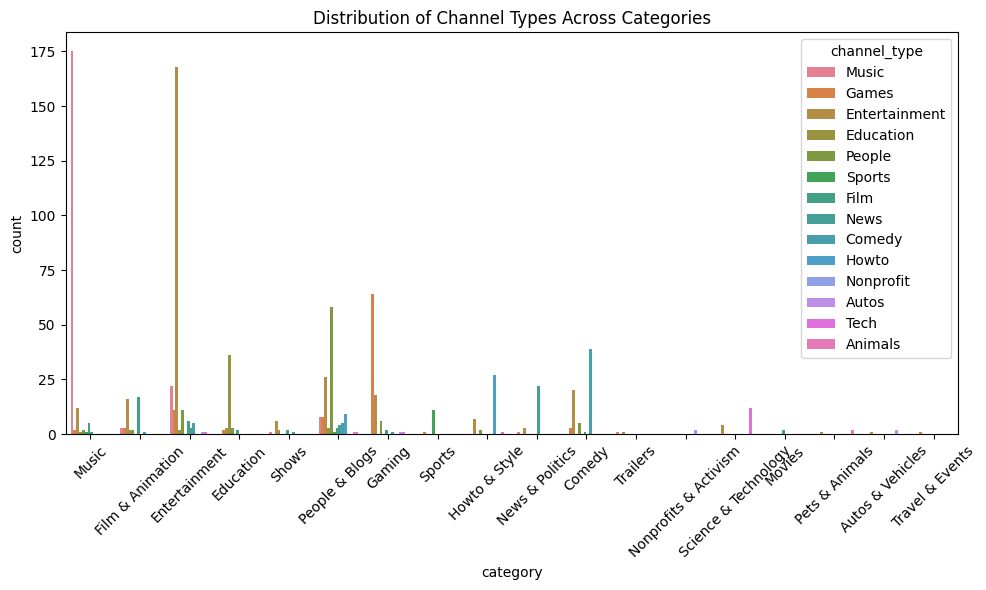

In [13]:
# 5. Distribution of Channel Types Across Different Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='category', hue='channel_type')
plt.title('Distribution of Channel Types Across Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation between subscribers and video views: 0.7482433123009609


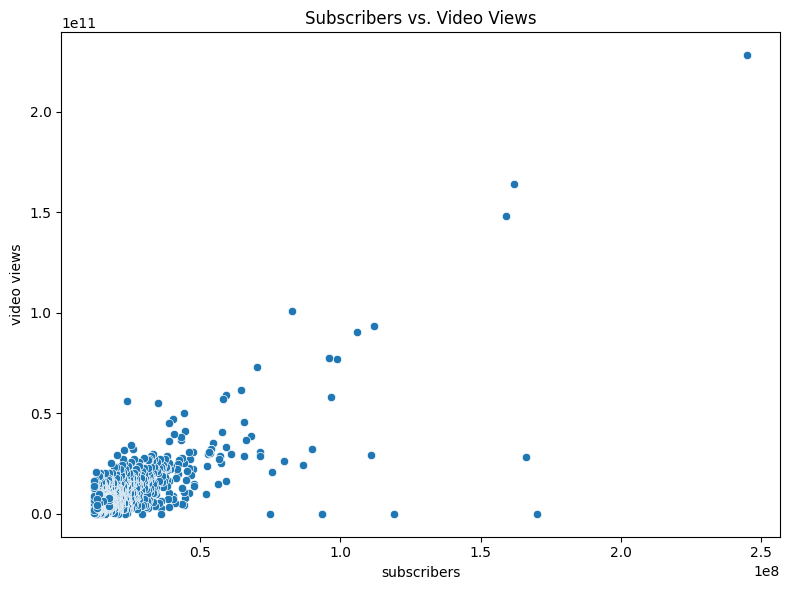

In [15]:
# 6. Correlation Between Subscribers and Video Views
correlation = data['subscribers'].corr(data['video views'])
print(f"Correlation between subscribers and video views: {correlation}")
# Scatter plot for visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='subscribers', y='video views')
plt.title('Subscribers vs. Video Views')
plt.tight_layout()
plt.show()

Monthly Earnings by Category:
                       lowest_monthly_earnings  highest_monthly_earnings
category                                                                
Autos & Vehicles                  74966.666667              1.190900e+06
Comedy                            41332.285714              6.597635e+05
Education                         46863.239348              7.518043e+05
Entertainment                     39393.724370              6.293549e+05
Film & Animation                  46802.533556              7.489841e+05
Gaming                            16965.790316              2.720201e+05
Howto & Style                     12022.350500              1.920441e+05
Movies                            28400.000000              4.547000e+05
Music                             34671.696798              5.535735e+05
News & Politics                   40192.625000              6.426320e+05
Nonprofits & Activism             24400.000000              3.904000e+05
People & Blogs       

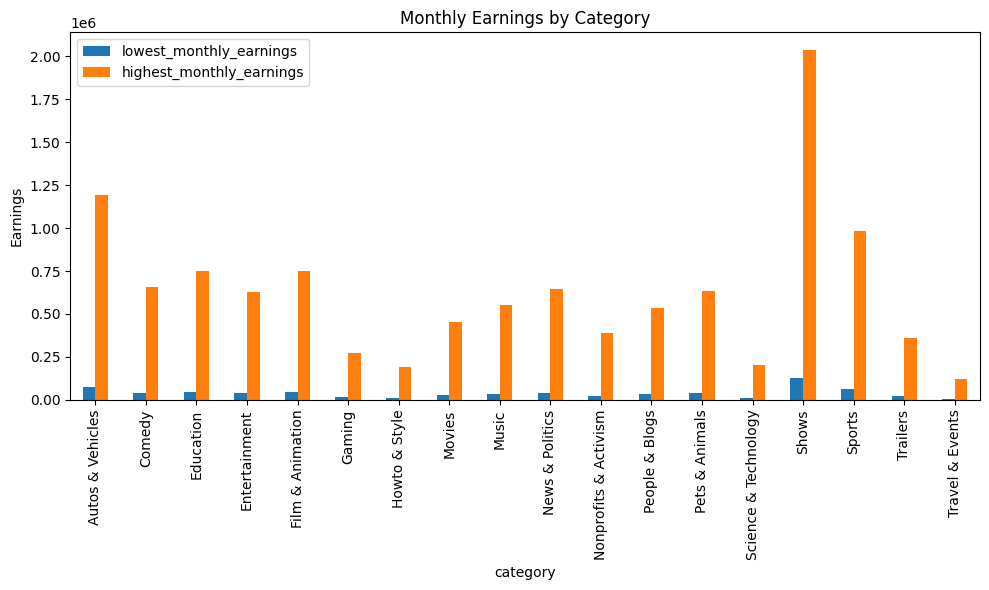

In [16]:
# 7. Monthly Earnings Variation Across Categories
monthly_earnings = data.groupby('category')[['lowest_monthly_earnings', 'highest_monthly_earnings']].mean()
print("Monthly Earnings by Category:")
print(monthly_earnings)

# Visualization of monthly earnings variation
monthly_earnings.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Earnings by Category')
plt.ylabel('Earnings')
plt.tight_layout()
plt.show()

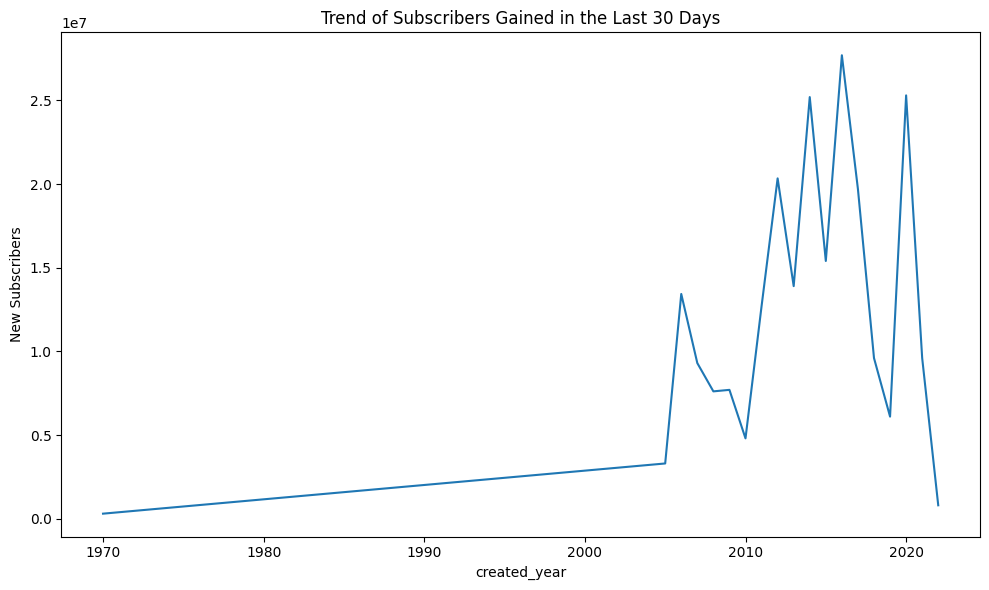

In [17]:
# 8. Trend in Subscribers Gained in the Last 30 Days
subscribers_trend = data.groupby('created_year')['subscribers_for_last_30_days'].sum()
subscribers_trend.plot(kind='line', figsize=(10, 6))
plt.title('Trend of Subscribers Gained in the Last 30 Days')
plt.ylabel('New Subscribers')
plt.tight_layout()
plt.show()

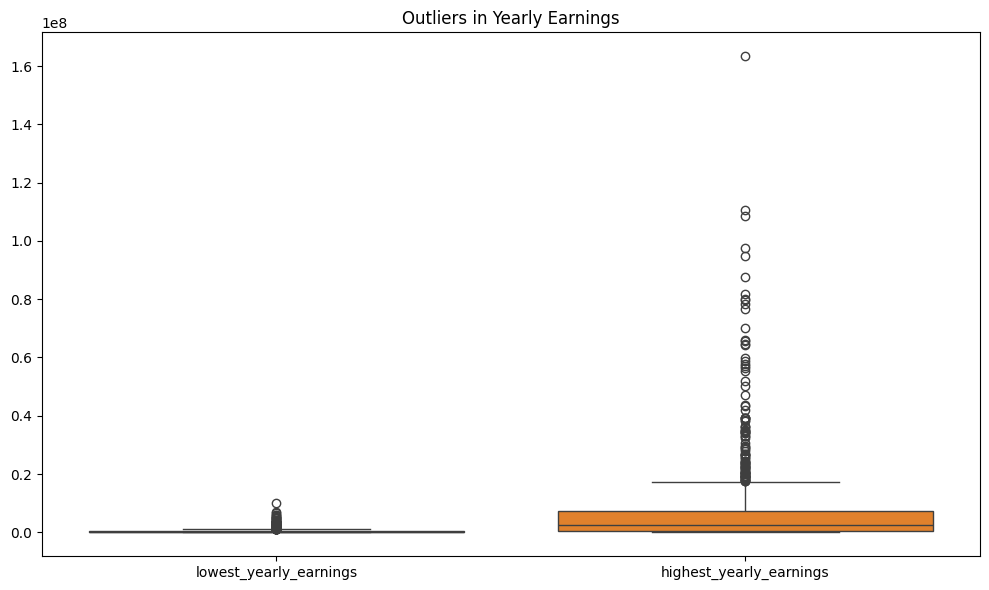

In [18]:
# 9. Outliers in Yearly Earnings
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['lowest_yearly_earnings', 'highest_yearly_earnings']])
plt.title('Outliers in Yearly Earnings')
plt.tight_layout()
plt.show()

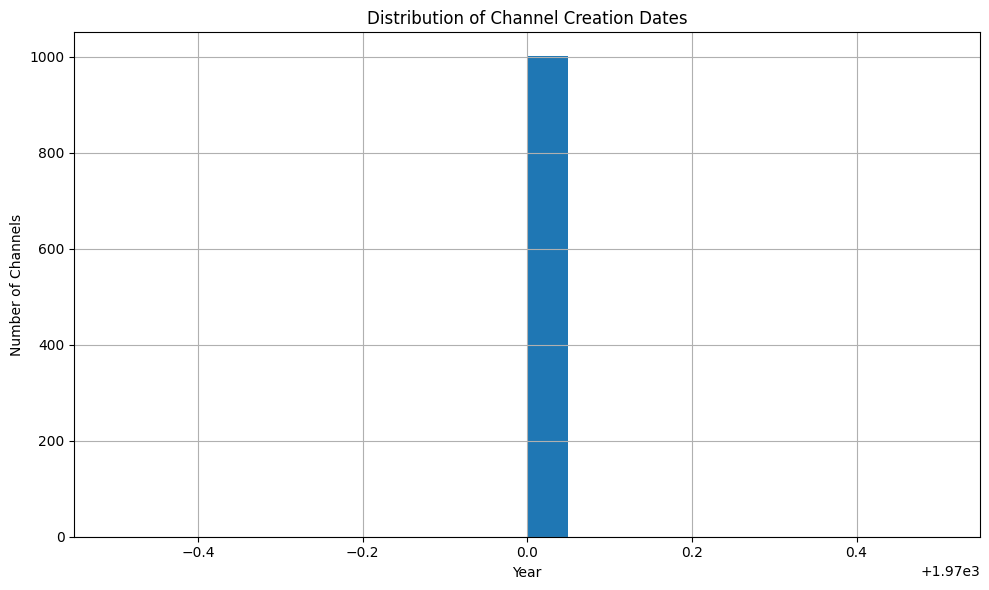

In [19]:
# 10. Distribution of Channel Creation Dates
plt.figure(figsize=(10, 6))
data['created_year'] = data['created_date'].dt.year
data['created_year'].hist(bins=20)
plt.title('Distribution of Channel Creation Dates')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.tight_layout()
plt.show()

In [20]:
# 11. Relationship Between Tertiary Education Enrollment and Number of YouTube Channels
channels_per_country = data['Country'].value_counts()
tertiary_education = data.groupby('Country')['Gross tertiary education enrollment (%)'].mean()
education_vs_channels = pd.DataFrame({
    'channels': channels_per_country,
    'tertiary_education': tertiary_education
})
print("Relationship between Tertiary Education and Number of Channels:")
print(education_vs_channels)

Relationship between Tertiary Education and Number of Channels:
                      channels  tertiary_education
Country                                           
Afghanistan                  1                 9.7
Andorra                      1                 NaN
Argentina                   13                90.0
Australia                    9               113.1
Bangladesh                   1                20.6
Barbados                     1                65.4
Brazil                      62                51.3
Canada                      15                68.9
Chile                        3                88.5
China                        1                50.6
Colombia                    11                55.3
Cuba                         1                41.4
Ecuador                      2                44.9
Egypt                        2                35.2
El Salvador                  1                29.4
Finland                      1                88.2
France            

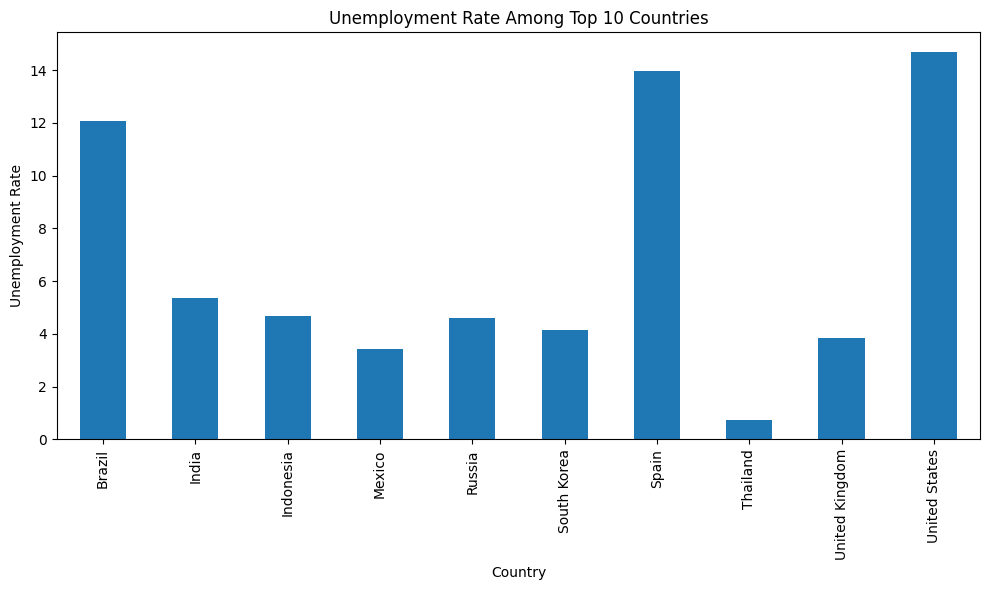

In [21]:
# 12. Unemployment Rate Among Top 10 Countries
top_10_countries = channels_per_country.head(10).index
unemployment_top_10 = data[data['Country'].isin(top_10_countries)].groupby('Country')['Unemployment rate'].mean()
unemployment_top_10.plot(kind='bar', figsize=(10, 6))
plt.title('Unemployment Rate Among Top 10 Countries')
plt.ylabel('Unemployment Rate')
plt.tight_layout()
plt.show()

In [22]:
# 13. Average Urban Population Percentage
average_urban_population = data['Urban_population'].mean()
print(f"Average Urban Population Percentage: {average_urban_population}%")

Average Urban Population Percentage: 223974718.82045454%


<ipython-input-23-53004518f1d5>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


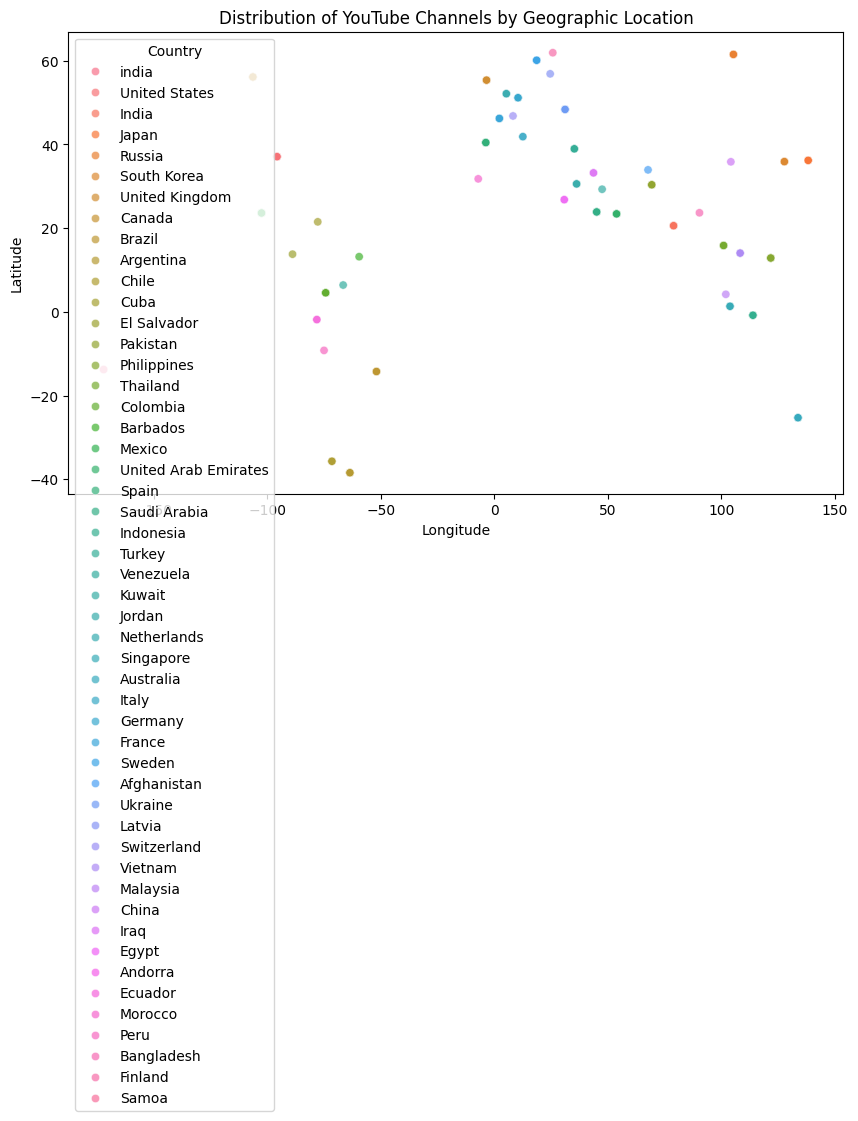

In [23]:
# 14. Patterns in Latitude and Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='Country', alpha=0.7)
plt.title('Distribution of YouTube Channels by Geographic Location')
plt.tight_layout()
plt.show()

In [24]:
# 15. Correlation Between Subscribers and Population
correlation_subscribers_population = data['subscribers'].corr(data['Population'])
print(f"Correlation between subscribers and population: {correlation_subscribers_population}")

Correlation between subscribers and population: 0.08242031484505022


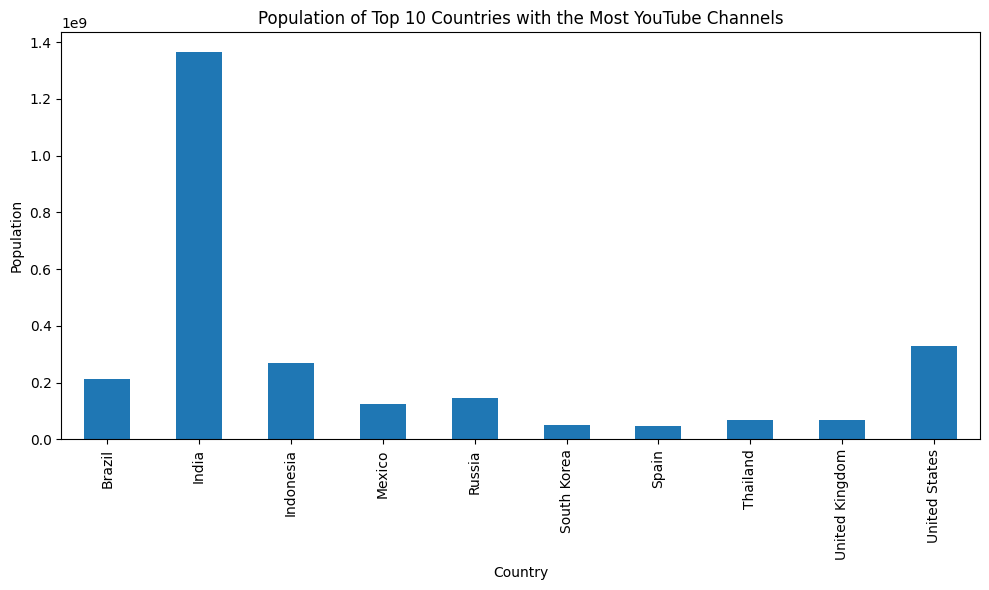

In [25]:
# 16. Top 10 Countries’ Population Comparison
population_top_10 = data[data['Country'].isin(top_10_countries)].groupby('Country')['Population'].mean()
population_top_10.plot(kind='bar', figsize=(10, 6))
plt.title('Population of Top 10 Countries with the Most YouTube Channels')
plt.ylabel('Population')
plt.tight_layout()
plt.show()

In [26]:
# 17. Correlation Between Subscribers Gained and Unemployment Rate
correlation_subs_unemployment = data['subscribers_for_last_30_days'].corr(data['Unemployment rate'])
print(f"Correlation between subscribers gained and unemployment rate: {correlation_subs_unemployment}")

Correlation between subscribers gained and unemployment rate: -0.02203138194323437


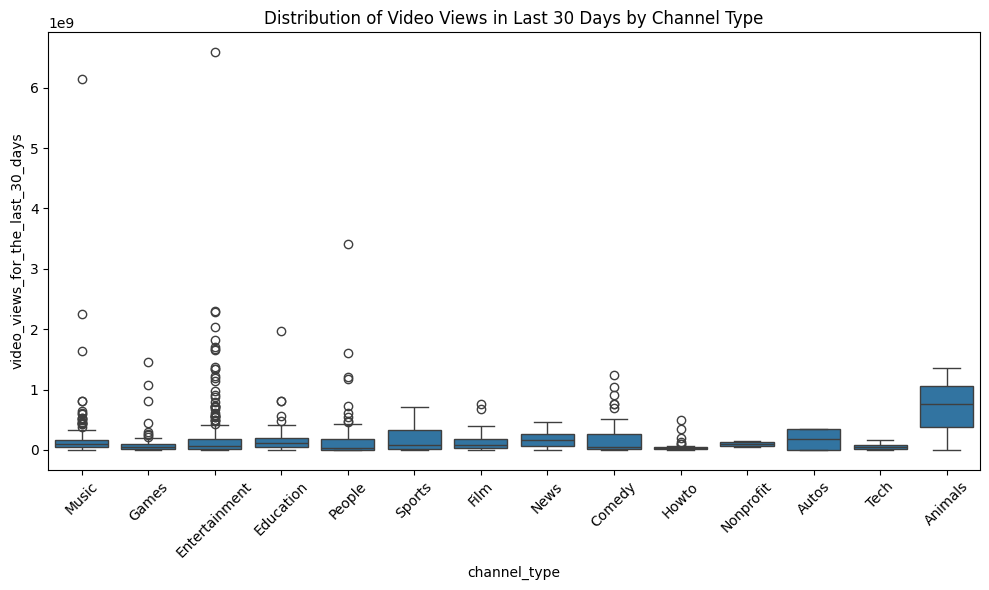

In [27]:
# 18. Distribution of Video Views for the Last 30 Days Across Channel Types
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='channel_type', y='video_views_for_the_last_30_days')
plt.title('Distribution of Video Views in Last 30 Days by Channel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

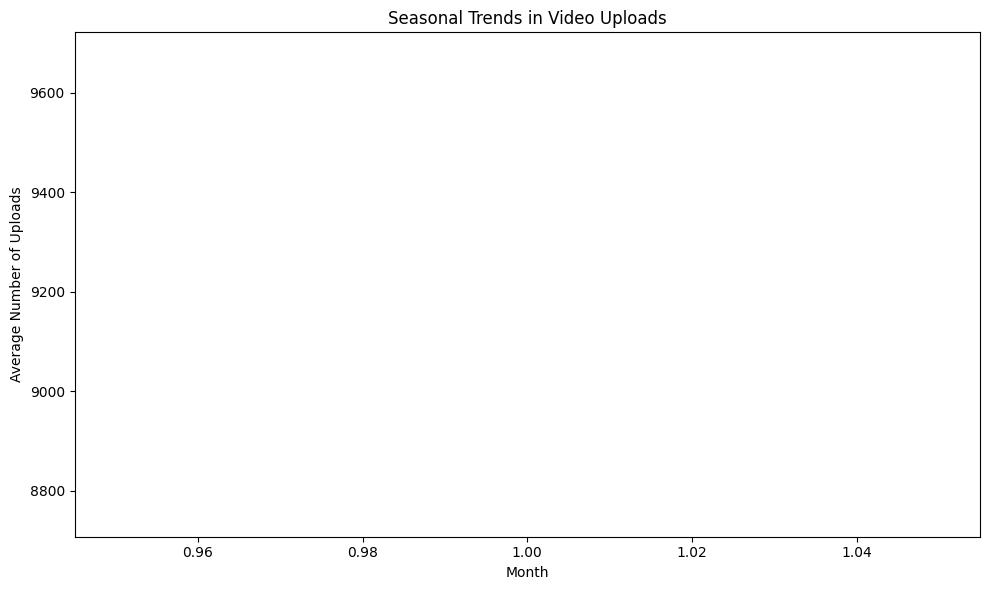

In [31]:
# 19. Seasonal Trends in Videos Uploaded
data['created_month'] = data['created_date'].dt.month
monthly_uploads = data.groupby('created_month')['uploads'].mean()
monthly_uploads.plot(kind='line', figsize=(10, 6))
plt.title('Seasonal Trends in Video Uploads')
plt.xlabel('Month')
plt.ylabel('Average Number of Uploads')
plt.tight_layout()
plt.show()

In [32]:
# 20. Average Subscribers Gained Per Month
data['months_since_creation'] = ((pd.to_datetime('today') - data['created_date']).dt.days) / 30
data['avg_subscribers_per_month'] = data['subscribers'] / data['months_since_creation']
print("Average Subscribers Gained Per Month:")
print(data[['Youtuber', 'avg_subscribers_per_month']].head(10))

Average Subscribers Gained Per Month:
                     Youtuber  avg_subscribers_per_month
0                    T-Series              367114.529744
1              YouTube Movies              254732.530843
2                     MrBeast              248738.824235
3  Cocomelon - Nursery Rhymes              242745.117626
4                   SET India              238249.837670
5                       Music              178312.771590
6         ýýý Kids Diana Show              167823.785026
7                   PewDiePie              166325.358374
8                 Like Nastya              158833.225114
9               Vlad and Niki              148194.395884
